In [2]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from PIL import Image

# Путь к директории с изображениями
data_dir = './flowers'

# Размерность, к которой будут приведены все изображения
target_size = (150, 150)

# Инициализация списка для данных и меток
data = []
labels = []

# Список классов (папок)
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

# Преобразуем изображения
for label, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        
        # Открываем изображение
        img = Image.open(img_path)
        
        # Преобразуем изображение к нужному размеру
        img_resized = img.resize(target_size)
        
        # Преобразуем изображение в массив
        img_array = np.array(img_resized)
        
        # Добавляем изображение и метку в список
        if img_array.shape == (target_size[0], target_size[1], 3):  # Убедимся, что изображение RGB
            data.append(img_array)
            labels.append(label)

# Преобразуем данные в numpy массивы
data = np.array(data)
labels = np.array(labels)

# Нормализация данных
data = data / 255.0

# Разделение на обучающую и валидационную выборки (например, 80% - 20%)
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, stratify=labels)

# Преобразование меток в one-hot кодировку
y_train = to_categorical(y_train, num_classes=len(classes))
y_val = to_categorical(y_val, num_classes=len(classes))

# Пример того, как данные выглядят после преобразования
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер валидационной выборки: {X_val.shape}")
print(f"Пример меток: {y_train[0]}")


Размер обучающей выборки: (3453, 150, 150, 3)
Размер валидационной выборки: (864, 150, 150, 3)
Пример меток: [0. 0. 0. 0. 1.]


Epoch 1/100
216/216 [==============================] - 6s 15ms/step - loss: 1.3325 - accuracy: 0.4205 - val_loss: 1.0549 - val_accuracy: 0.5880
Epoch 2/100
216/216 [==============================] - 2s 11ms/step - loss: 1.0543 - accuracy: 0.5824 - val_loss: 0.9462 - val_accuracy: 0.6366
Epoch 3/100
216/216 [==============================] - 2s 10ms/step - loss: 0.9088 - accuracy: 0.6357 - val_loss: 0.8914 - val_accuracy: 0.6470
Epoch 4/100
216/216 [==============================] - 2s 10ms/step - loss: 0.8195 - accuracy: 0.6866 - val_loss: 0.8311 - val_accuracy: 0.6759
Epoch 5/100
216/216 [==============================] - 2s 10ms/step - loss: 0.7308 - accuracy: 0.7298 - val_loss: 0.8100 - val_accuracy: 0.6944
Epoch 6/100
216/216 [==============================] - 2s 10ms/step - loss: 0.6218 - accuracy: 0.7773 - val_loss: 0.7832 - val_accuracy: 0.7153
Epoch 7/100
216/216 [==============================] - 2s 10ms/step - loss: 0.5241 - accuracy: 0.8094 - val_loss: 0.8492 - val_accuracy:

INFO:tensorflow:Assets written to: ram://88e9474f-6675-4a8f-957f-087205120eaa/assets


INFO:tensorflow:Assets written to: ram://88e9474f-6675-4a8f-957f-087205120eaa/assets


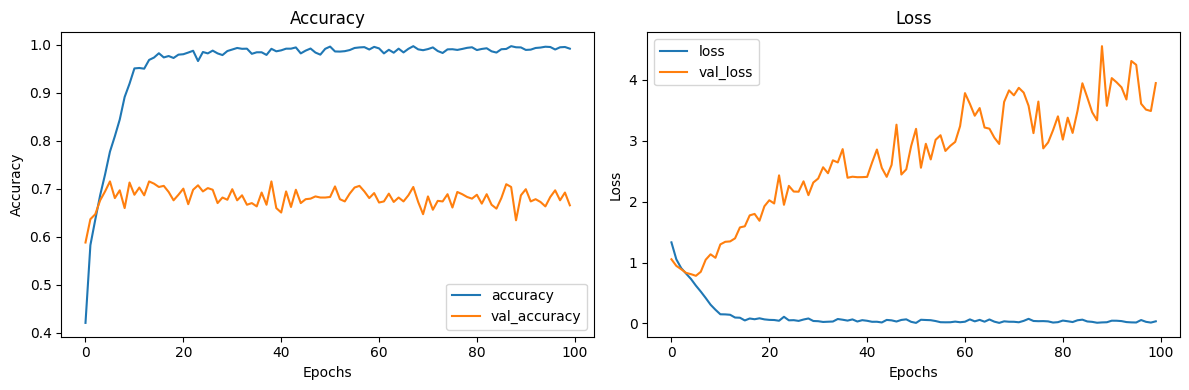

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from pickle import dump, load

# Параметры
target_size = (150, 150)  # Размер изображений
batch_size = 2
epochs = 50
num_classes = len(classes)

# Строим сверточную нейронную сеть
model = models.Sequential([
    # Сверточные слои и слои подвыборки
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(target_size[0], target_size[1], 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Выпрямление
    layers.Flatten(),
    
    # Полносвязные слои
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Дропаут для борьбы с переобучением
    layers.Dense(num_classes, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),  # Передаем валидационные данные для оценки на каждом шаге
    epochs=100,
    batch_size=16
)

filename = 'split.sav'
dump(model, open(filename, 'wb'))

# Построение графиков точности и ошибки
plt.figure(figsize=(12, 4))

# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# График ошибки потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
import os
import numpy as np
from joblib import load
from PIL import Image

# Загрузка модели
model = load('full.sav')

# Путь к основной папке с изображениями
root_dir = r'D:\Vyzovskoe3-4\7 сем\Анализ данных\лр4\flowers_test'

# Список классов
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

# Размер изображений для модели
target_size = (150, 150)

# Проход по каждой папке (классу)
for class_name in os.listdir(root_dir):
    class_dir = os.path.join(root_dir, class_name)

    # Проверяем, что это папка и имя соответствует классу
    if os.path.isdir(class_dir) and class_name in classes:
        print(f"\nChecking images in class folder: {class_name}")

        # Проход по всем изображениям внутри папки
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)

            try:
                # Проверка, что это файл изображения
                if img_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                    # Загрузка изображения
                    img = Image.open(img_path).convert('RGB')  # Преобразование в RGB
                    img = img.resize(target_size)  # Изменение размера

                    # Преобразование изображения в массив
                    img = np.array(img)
                    img = np.expand_dims(img, axis=0)  # Добавление batch dimension
                    img = img.astype(np.float32) / 255.0  # Нормализация

                    # Предсказание
                    y_pred = model.predict(img)
                    predicted_class_index = np.argmax(y_pred)  # Индекс предсказанного класса
                    predicted_class = classes[predicted_class_index]  # Название предсказанного класса

                    # Вывод результатов
                    print(f"Image: {img_name} | True Class: {class_name} | Predicted Class: {predicted_class}")
            except Exception as e:
                print(f"Error processing image {img_name}: {e}")



Checking images in class folder: daisy
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step
Image: Снимок экрана 2024-12-18 014335.png | True Class: daisy | Predicted Class: daisy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Image: Снимок экрана 2024-12-18 014400.png | True Class: daisy | Predicted Class: daisy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Image: Снимок экрана 2024-12-18 014413.png | True Class: daisy | Predicted Class: daisy

Checking images in class folder: dandelion
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Image: Снимок экрана 2024-12-18 014430.png | True Class: dandelion | Predicted Class: dandelion
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Image: Снимок экрана 2024-12-18 014446.png | True Class: dandelion | Predicted Class: dandelion
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Image: Снимок экрана 2024-12-18 014500.png | True Class: dandelion | Predicted Class: dandelion

Checking images in class folder: rose
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Image: Снимок экрана 2024-12-18 014538.png | True Class: r

In [22]:

var = data[1]
print(type(var))
print(len(var))
print(var)
for i in data:
    print(len(i))



<class 'numpy.ndarray'>
150
[[[0.83921569 0.82745098 0.71764706]
  [0.81960784 0.79607843 0.66666667]
  [0.81176471 0.76470588 0.60784314]
  ...
  [0.7372549  0.47843137 0.20784314]
  [0.81960784 0.63137255 0.35686275]
  [0.82352941 0.70980392 0.41568627]]

 [[0.82745098 0.83921569 0.72941176]
  [0.82352941 0.81568627 0.70196078]
  [0.82745098 0.79215686 0.64705882]
  ...
  [0.7254902  0.44313725 0.15686275]
  [0.78823529 0.57647059 0.2627451 ]
  [0.80784314 0.60392157 0.29411765]]

 [[0.81568627 0.84313725 0.74117647]
  [0.82352941 0.82745098 0.72156863]
  [0.82745098 0.80392157 0.68235294]
  ...
  [0.72941176 0.43529412 0.13333333]
  [0.7372549  0.49411765 0.15294118]
  [0.78431373 0.54509804 0.2       ]]

 ...

 [[0.94509804 0.96078431 0.9372549 ]
  [0.96470588 0.98823529 0.97647059]
  [0.97254902 0.99215686 0.98823529]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.97254902 0.99215686 0.98823529]
  [0.9803